# Predictive Maintenance of Hydraulics System

[https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems](https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems)

In [1]:
import os
import multiprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm

sns.set(font_scale=1.2)

## Data loading

### Attributes

In [2]:
def make_pressure_dataframe(fp, cycle_id=0):
    """ 100 Hz. 6000 samples in each cycle
    """
    data = pd.DataFrame(columns=[f'PS{i+1}' for i in range(6)])
    for i in range(6):
        data[f'PS{i+1}'] = np.loadtxt(fp + f'/PS{i+1}.txt.gz')[cycle_id]
    return data

In [3]:
df_ps = make_pressure_dataframe('../datasets/hydsys', cycle_id=0)
df_ps

,PS1,PS2,PS3,PS4,PS5,PS6
0,151.47,125.50,2.305,0.0,9.936,9.818
1,151.45,125.39,2.305,0.0,9.947,9.823
2,151.52,125.40,2.336,0.0,9.964,9.844
3,151.27,125.03,2.578,0.0,9.989,9.861
4,150.80,124.05,2.977,0.0,9.996,9.877
...,...,...,...,...,...,...
5995,151.16,124.91,2.383,0.0,9.715,9.599
5996,151.14,124.98,2.328,0.0,9.736,9.620
5997,151.10,125.11,2.250,0.0,9.745,9.639
5998,151.21,125.14,2.250,0.0,9.740,9.634


In [4]:
def make_motor_power_dataframe(fp, cycle_id=0):
    """ 100 Hz. 6000 samples in each cycle
    """
    return pd.DataFrame(np.loadtxt(fp + '/EPS1.txt.gz')[cycle_id],
        columns=['EPS1'])


<AxesSubplot:>

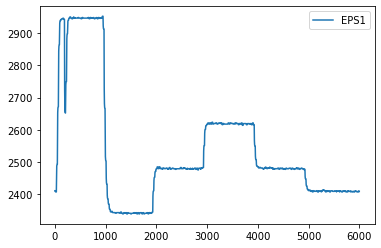

In [40]:
df_eps = make_motor_power_dataframe('../data/hydsys')
df_eps.plot()

In [23]:
def make_volume_flow_dataframe(fp, cycle_id=0):
    """ 10 Hz. 600 samples in each cycle
    """
    data = pd.DataFrame(columns=['FS1', 'FS2'])
    data['FS1'] = np.loadtxt(fp + '/FS1.txt.gz')[cycle_id]
    data['FS2'] = np.loadtxt(fp + '/FS2.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

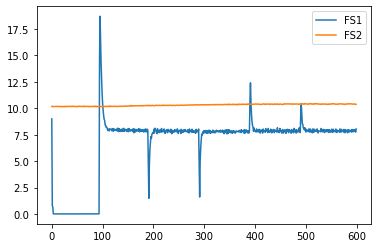

In [24]:
df_fs = make_volume_flow_dataframe('../data/hydsys')
df_fs.plot()

In [26]:
def make_temp_dataframe(fp, cycle_id=0):
    """ 1 Hz. 60 samples in each cycle
    """
    data = pd.DataFrame(columns=[f'TS{i+1}' for i in range(4)])
    data['TS1'] = np.loadtxt(fp + '/TS1.txt.gz')[cycle_id]
    data['TS2'] = np.loadtxt(fp + '/TS2.txt.gz')[cycle_id]
    data['TS3'] = np.loadtxt(fp + '/TS3.txt.gz')[cycle_id]
    data['TS4'] = np.loadtxt(fp + '/TS4.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

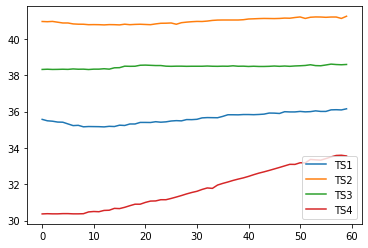

In [28]:
make_temp_dataframe('../data/hydsys').plot()

In [29]:
def make_vibration_dataframe(fp, cycle_id=0):
    return pd.DataFrame(np.loadtxt(fp + '/VS1.txt.gz')[cycle_id], columns=['VS1'])

<AxesSubplot:>

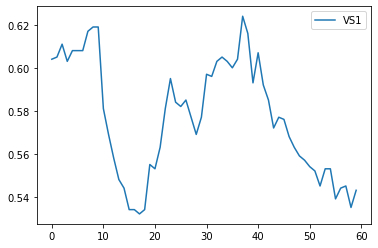

In [30]:
make_vibration_dataframe('../data/hydsys').plot()

In [33]:
def make_efficiency_dataframe(fp, cycle_id=0):
    return pd.DataFrame(np.loadtxt(fp + '/SE.txt.gz')[cycle_id], columns=['SE'])

<AxesSubplot:>

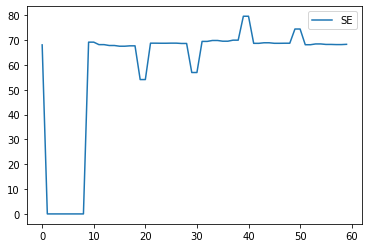

In [34]:
make_efficiency_dataframe('../data/hydsys').plot()

In [35]:
def make_cooling_dataframe(fp, cycle_id=0):
    data = pd.DataFrame(columns=['CE', 'CP'])
    data['CE'] = np.loadtxt(fp + '/CE.txt.gz')[cycle_id]
    data['CP'] = np.loadtxt(fp + '/CP.txt.gz')[cycle_id]
    return data

<AxesSubplot:>

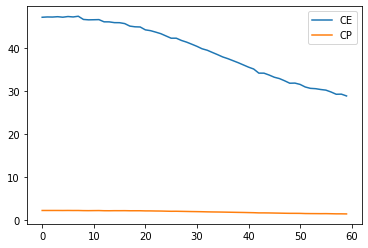

In [36]:
make_cooling_dataframe('../data/hydsys').plot()

### The target condition values

- Cooler condition / %:
    - 3: close to total failure
    - 20: reduced effifiency
    - 100: full efficiency
- Valve condition / %:
    - 100: optimal switching behavior
    - 90: small lag
    - 80: severe lag
    - 73: close to total failure
- Internal pump leakage:
    - 0: no leakage
    - 1: weak leakage
    - 2: severe leakage
- Hydraulic accumulator / bar:
    - 130: optimal pressure
    - 115: slightly reduced pressure
    - 100: severely reduced pressure
    - 90: close to total failure
- stable flag:
    - 0: conditions were stable
    - 1: static conditions might not have been reached yet

In [43]:
def make_condition_dataframe(fp):
    return pd.DataFrame(np.loadtxt(fp + '/profile.txt'),
        columns=[
            'cooler_condition',
            'valve_condition',
            'internal_pump_leakage',
            'hydraulic_accumulator',
            'stable_flag']).reset_index().rename(
                columns={'index': 'cycle'})

In [44]:
df_pf = make_condition_dataframe('../data/hydsys')
df_pf

,cycle,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,0,3.0,100.0,0.0,130.0,1.0
1,1,3.0,100.0,0.0,130.0,1.0
2,2,3.0,100.0,0.0,130.0,1.0
3,3,3.0,100.0,0.0,130.0,1.0
4,4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...
2200,2200,100.0,100.0,0.0,90.0,0.0
2201,2201,100.0,100.0,0.0,90.0,0.0
2202,2202,100.0,100.0,0.0,90.0,0.0
2203,2203,100.0,100.0,0.0,90.0,0.0


In [ ]:
# df_pf.iloc[200:500].stable_flag.plot()
# df_pf.iloc[0:].valve_condition.plot(legend=True)


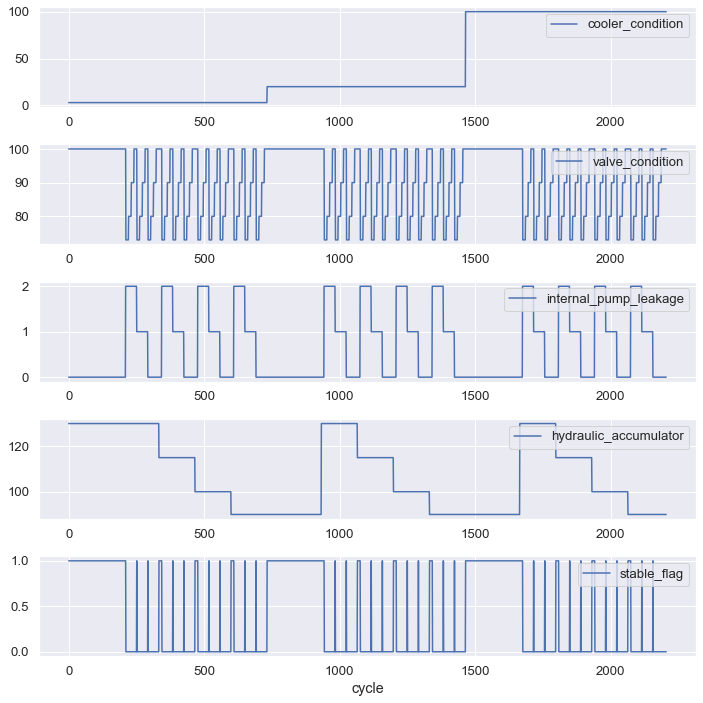

In [59]:
os.makedirs('../out', exist_ok=True)
fig, ax = plt.subplots(5, figsize=(10, 10))
for i, axi in enumerate(ax):
    df_pf.set_index('cycle').iloc[:, i].plot(legend=True, ax=axi)
    if i < 4:
        axi.set_xlabel(None)

fig.tight_layout()
fig.savefig('../out/hydsys_profile.png', 
            bbox_inches='tight')

In [55]:
def resample(df, rw=0):
    if rw > 0:
        # Resampling
        df = df.T
        df['index'] = df.index.values // rw
        df = df.groupby('index').mean()
        df = df.T

    return df

In [56]:
def load_PS(rw=0):
    fp = '../datasets/hydsys'
    data = []

    for i in tqdm.trange(6, desc='PS'):
        df = pd.DataFrame(np.loadtxt(fp + f'/PS{i+1}.txt.gz'))
        df = resample(df, rw)
        df['sensor'] = f'PS{i+1}'
        df['cycle'] = df.index.values    
        data.append(df)

    return pd.concat(data).set_index(['cycle', 'sensor']).reset_index()

In [50]:
load_PS(rw=10)

PS: 100%|██████████| 6/6 [00:25<00:00,  4.20s/it]


index,cycle,sensor,0,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,0,PS1,152.2460,157.1790,163.4220,170.2790,177.5520,185.0770,189.6030,190.9500,...,151.2210,151.1420,151.1170,151.1350,151.1620,151.1610,151.1000,151.0450,151.1020,151.1660
1,1,PS1,151.7580,156.1370,161.1640,166.5700,172.4710,178.6380,184.9760,189.2150,...,150.8390,150.8490,150.7980,150.8770,150.8420,150.8730,150.8750,150.8120,150.8380,150.8110
2,2,PS1,151.4220,155.8630,160.9800,166.2930,172.1410,178.3100,184.6190,189.0020,...,150.5790,150.5400,150.5010,150.5540,150.5070,150.4770,150.5030,150.4870,150.5120,150.4800
3,3,PS1,151.1090,155.4580,160.4720,165.8130,171.6490,177.8050,184.1300,188.7760,...,150.3710,150.3470,150.3740,150.3420,150.3070,150.2870,150.2680,150.2740,150.2870,150.3190
4,4,PS1,150.9170,155.2400,160.2200,165.6160,171.3970,177.4880,183.7080,188.4950,...,150.1600,150.1150,150.0540,150.0770,150.1610,150.1820,150.1460,150.2420,150.2660,150.2330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,2200,PS6,9.8604,9.8593,9.8593,9.8555,9.8557,9.8542,9.8556,9.8512,...,9.8455,9.8488,9.8523,9.8473,9.8443,9.8424,9.8469,9.8512,9.8524,9.8487
13226,2201,PS6,9.8518,9.8537,9.8473,9.8549,9.8558,9.8487,9.8478,9.8538,...,9.8433,9.8428,9.8436,9.8469,9.8508,9.8454,9.8448,9.8413,9.8375,9.8448
13227,2202,PS6,9.8521,9.8462,9.8466,9.8503,9.8506,9.8488,9.8449,9.8487,...,9.8394,9.8463,9.8440,9.8505,9.8453,9.8419,9.8447,9.8441,9.8466,9.8488
13228,2203,PS6,9.8463,9.8388,9.8349,9.8363,9.8381,9.8461,9.8417,9.8361,...,9.8640,9.8558,9.8526,9.8541,9.8536,9.8565,9.8585,9.8586,9.8490,9.8526


In [60]:
def load_EPS(rw=0):
    fp = '../datasets/hydsys'
    df = pd.DataFrame(np.loadtxt(fp + '/EPS1.txt.gz'))
    df = resample(df, rw)
    df['sensor'] = 'EPS1'
    df['cycle']  = df.index.values
    return df.set_index(['cycle', 'sensor']).reset_index()

In [62]:
load_EPS(rw=10)

index,cycle,sensor,0,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,0,EPS1,2411.40,2408.26,2409.00,2478.24,2496.14,2640.00,2673.84,2829.46,...,2407.9,2410.92,2411.40,2409.88,2409.60,2408.08,2407.8,2409.32,2409.50,2409.52
1,1,EPS1,2409.60,2406.56,2406.80,2463.00,2477.64,2595.80,2623.78,2758.16,...,2397.8,2397.80,2397.70,2396.20,2396.10,2397.60,2397.7,2397.54,2397.90,2398.06
2,2,EPS1,2397.60,2394.12,2394.80,2453.24,2471.46,2580.32,2611.64,2740.46,...,2387.1,2382.48,2382.30,2385.28,2385.60,2385.60,2385.5,2384.00,2383.80,2383.80
3,3,EPS1,2383.60,2382.12,2387.20,2438.52,2456.98,2569.74,2598.62,2729.24,...,2375.7,2374.20,2374.10,2375.60,2375.90,2375.88,2375.7,2375.52,2375.30,2372.32
4,4,EPS1,2372.10,2373.60,2378.50,2426.66,2445.02,2557.84,2586.72,2717.30,...,2369.7,2369.56,2370.00,2373.12,2372.90,2368.28,2368.1,2371.24,2371.40,2369.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,EPS1,2416.40,2418.60,2420.20,2483.10,2527.22,2631.06,2703.14,2814.56,...,2414.0,2414.00,2414.10,2417.12,2417.50,2412.84,2412.1,2415.08,2415.50,2415.52
2201,2201,EPS1,2415.60,2414.08,2415.00,2487.40,2506.24,2654.90,2689.70,2840.66,...,2417.6,2416.26,2415.80,2415.80,2415.80,2414.32,2413.8,2415.14,2415.60,2413.92
2202,2202,EPS1,2413.60,2415.12,2415.40,2484.56,2508.92,2646.24,2692.16,2831.68,...,2417.6,2414.28,2411.82,2413.86,2415.60,2415.78,2415.6,2414.52,2413.60,2413.42
2203,2203,EPS1,2413.60,2415.76,2417.60,2477.92,2526.00,2629.64,2710.64,2811.66,...,2415.6,2417.32,2419.38,2417.78,2415.82,2415.80,2415.8,2414.56,2413.78,2414.94


In [64]:
def get_sensor_list(name):
    if name == 'PS':
        return [f'PS{i+1}' for i in range(6)]
    elif name == 'EPS':
        return ['EPS1']
    elif name == 'FS':
        return [f'FS{i+1}' for i in range(2)]
    elif name == 'TS':
        return [f'TS{i+1}' for i in range(4)]
    elif name == 'VS':
        return ['VS1']
    else:
        raise ValueError


In [80]:
def load_sensor_data(sensor, rw=0):

    data = []
    sensor_list = get_sensor_list(sensor)
    n_files = len(sensor_list)

    for i, name in tqdm.tqdm(enumerate(sensor_list), desc=sensor):
        df = pd.DataFrame(np.loadtxt(fp + f'/{name}.txt.gz'))
        df = resample(df, rw)
        df['sensor'] = name
        df['cycle'] = df.index.values
        data.append(df)

    return pd.concat(data).set_index(['cycle', 'sensor']).reset_index()


In [98]:
def load_data(sensor=None, rw=0):
    
    if sensor is None:
        # load full data
        df = []
        df.append(load_sensor_data('PS', rw=10))  # default length: 6000
        df.append(load_sensor_data('EPS', rw=10))  # default length: 6000
        df.append(load_sensor_data('FS', rw=0))  # default length: 600
        # df.append(load_sensor_data('TS', rw=0))  # default length: 60
        return pd.concat(df)

    else:
        return load_sensor_data(sensor, rw)
        

In [97]:
# load_data('PS', rw=0)
# load_data('PS', rw=10)
# load_data('EPS', rw=0)
# load_data('EPS', rw=10)
# load_data('FS', rw=0)
# load_data('FS', rw=10)
# load_data('TS', rw=0)
# load_data('TS', rw=10)

In [99]:
load_data()

PS: 6it [00:25,  4.21s/it]
EPS: 1it [00:04,  4.40s/it]
FS: 2it [00:00,  2.35it/s]


,cycle,sensor,0,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,0,PS1,152.246,157.179,163.422,170.279,177.552,185.077,189.603,190.950,...,151.221,151.142,151.117,151.135,151.162,151.161,151.100,151.045,151.102,151.166
1,1,PS1,151.758,156.137,161.164,166.570,172.471,178.638,184.976,189.215,...,150.839,150.849,150.798,150.877,150.842,150.873,150.875,150.812,150.838,150.811
2,2,PS1,151.422,155.863,160.980,166.293,172.141,178.310,184.619,189.002,...,150.579,150.540,150.501,150.554,150.507,150.477,150.503,150.487,150.512,150.480
3,3,PS1,151.109,155.458,160.472,165.813,171.649,177.805,184.130,188.776,...,150.371,150.347,150.374,150.342,150.307,150.287,150.268,150.274,150.287,150.319
4,4,PS1,150.917,155.240,160.220,165.616,171.397,177.488,183.708,188.495,...,150.160,150.115,150.054,150.077,150.161,150.182,150.146,150.242,150.266,150.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2200,FS2,10.196,10.189,10.180,10.201,10.176,10.200,10.185,10.193,...,10.193,10.174,10.170,10.176,10.170,10.170,10.194,10.187,10.154,10.171
4406,2201,FS2,10.182,10.194,10.189,10.181,10.186,10.167,10.166,10.198,...,10.172,10.182,10.191,10.185,10.176,10.170,10.171,10.190,10.187,10.174
4407,2202,FS2,10.171,10.169,10.178,10.182,10.203,10.171,10.177,10.187,...,10.189,10.174,10.169,10.150,10.162,10.183,10.182,10.185,10.185,10.171
4408,2203,FS2,10.166,10.194,10.189,10.180,10.173,10.163,10.162,10.185,...,10.187,10.198,10.185,10.185,10.189,10.189,10.172,10.165,10.184,10.189


In [18]:
target=['cooler_condition',
            'valve_condition',
            'internal_pump_leakage',
            'hydraulic_accumulator',
            'stable_flag']
def load_label(fp):
    return pd.DataFrame(np.loadtxt(fp + '/profile.txt'),
        columns=target).reset_index()\
            .rename(columns={'index': 'cycle'})

In [19]:
label_df = load_label('../datasets/hydsys')
label_df

,cycle,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,0,3.0,100.0,0.0,130.0,1.0
1,1,3.0,100.0,0.0,130.0,1.0
2,2,3.0,100.0,0.0,130.0,1.0
3,3,3.0,100.0,0.0,130.0,1.0
4,4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...
2200,2200,100.0,100.0,0.0,90.0,0.0
2201,2201,100.0,100.0,0.0,90.0,0.0
2202,2202,100.0,100.0,0.0,90.0,0.0
2203,2203,100.0,100.0,0.0,90.0,0.0


<AxesSubplot:>

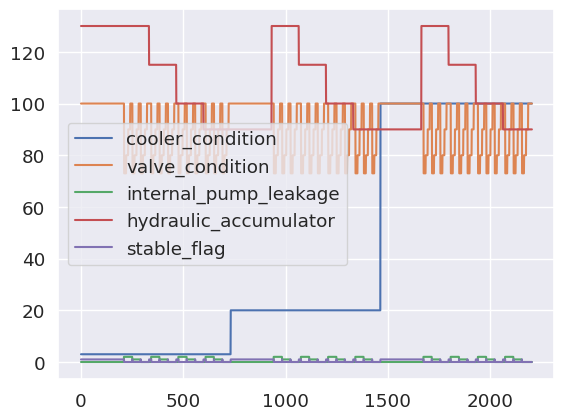

In [21]:
label_df[target].plot()